In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker


In [3]:
import pandas as pd

# Read the text file
                   
df = pd.read_csv('../DataCollection/Calibration_2_1_2024/Calibration_2_1_2024.txt')  # replace '\t' with your delimiter

# Save the DataFrame as a CSV file
df.to_csv('../DataCollection/Calibration_2_1_2024/Calibration_2_1_2024.csv', index=False)

df.head()  # prints the first 5 rows of the DataFrame

,Timestamp,Mode,Data
0,13:53:04.199,RX,Differential Pressure values:
1,13:53:04.201,RX,-0.08
2,13:53:04.201,RX,Pressure values:
3,13:53:04.202,RX,9839.20
4,13:53:04.350,RX,Differential Pressure values:


In [4]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
df['differential pressure value'] = np.where(df['Data'] == 'Differential Pressure values:', df['Data'].shift(-1), np.nan)
df['pressure values'] = np.where(df['Data'] == 'Pressure values:', df['Data'].shift(-1), np.nan)

# Fill NaN values
df['differential pressure value'].fillna(method='ffill', inplace=True)
df['pressure values'].fillna(method='ffill', inplace=True)

In [5]:
df.head(100)  # prints the first 5 rows of the DataFrame

,Timestamp,Mode,Data,differential pressure value,pressure values
0,13:53:04.199,RX,Differential Pressure values:,-0.08,NaN
1,13:53:04.201,RX,-0.08,-0.08,NaN
2,13:53:04.201,RX,Pressure values:,-0.08,9839.20
3,13:53:04.202,RX,9839.20,-0.08,9839.20
4,13:53:04.350,RX,Differential Pressure values:,-0.18,9839.20
...,...,...,...,...,...
95,13:53:07.711,RX,9839.50,-0.28,9839.50
96,13:53:07.861,RX,Differential Pressure values:,-0.28,9839.50
97,13:53:07.861,RX,-0.28,-0.28,9839.50
98,13:53:07.861,RX,Pressure values:,-0.28,9839.60


In [6]:

# Assuming df is your DataFrame

# Find rows where any cell has a NaN value
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows)
# Drop rows where any cell has a NaN value
df = df.dropna()

      Timestamp Mode                           Data  \
0  13:53:04.199   RX  Differential Pressure values:   
1  13:53:04.201   RX                          -0.08   

  differential pressure value pressure values  
0                       -0.08             NaN  
1                       -0.08             NaN  


In [7]:
df.head()

,Timestamp,Mode,Data,differential pressure value,pressure values
2,13:53:04.201,RX,Pressure values:,-0.08,9839.20
3,13:53:04.202,RX,9839.20,-0.08,9839.20
4,13:53:04.350,RX,Differential Pressure values:,-0.18,9839.20
5,13:53:04.351,RX,-0.18,-0.18,9839.20
6,13:53:04.351,RX,Pressure values:,-0.18,9839.50


In [8]:
df.tail()

,Timestamp,Mode,Data,differential pressure value,pressure values
37319,14:16:29.296,RX,9921.30,81.91,9921.30
37320,14:16:29.446,RX,Differential Pressure values:,81.81,9921.30
37321,14:16:29.451,RX,81.81,81.81,9921.30
37322,14:16:29.452,RX,Pressure values:,81.81,9921.50
37323,14:16:29.475,RX,9921.50,81.81,9921.50


In [9]:

df.to_csv('../DataCollection/Calibration_2_1_2024/Calibration_2_1_2024.csv', index=False)

df.head()  # prints the first 5 rows of the DataFrame 

,Timestamp,Mode,Data,differential pressure value,pressure values
2,13:53:04.201,RX,Pressure values:,-0.08,9839.20
3,13:53:04.202,RX,9839.20,-0.08,9839.20
4,13:53:04.350,RX,Differential Pressure values:,-0.18,9839.20
5,13:53:04.351,RX,-0.18,-0.18,9839.20
6,13:53:04.351,RX,Pressure values:,-0.18,9839.50


In [10]:
df.tail()

,Timestamp,Mode,Data,differential pressure value,pressure values
37319,14:16:29.296,RX,9921.30,81.91,9921.30
37320,14:16:29.446,RX,Differential Pressure values:,81.81,9921.30
37321,14:16:29.451,RX,81.81,81.81,9921.30
37322,14:16:29.452,RX,Pressure values:,81.81,9921.50
37323,14:16:29.475,RX,9921.50,81.81,9921.50


In [12]:
# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])



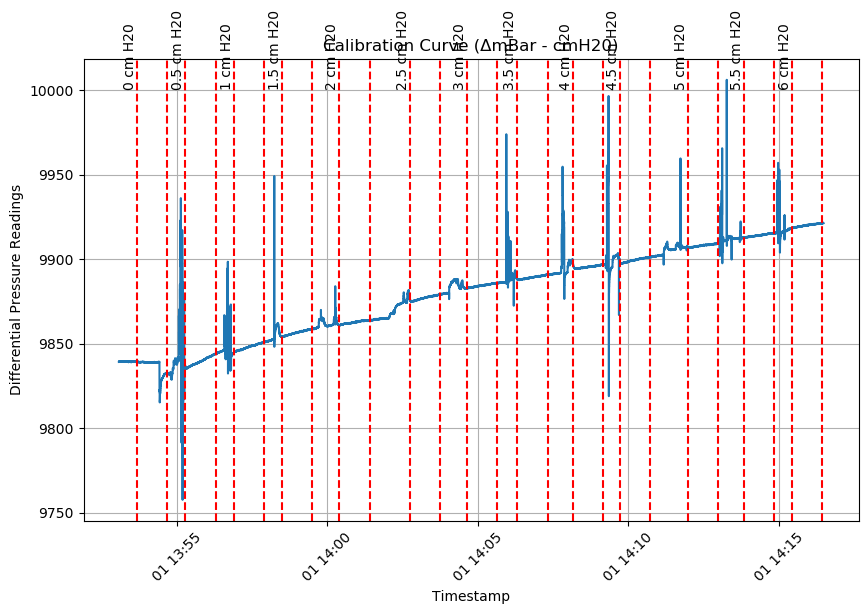

In [20]:

# Define start and end time
start_time = pd.to_datetime('13:53:04')
end_time = pd.to_datetime('14:16:29')

# Filter rows between start time and end time
filtered_df = df.copy()
filtered_df = filtered_df[(filtered_df['Timestamp'] >= start_time) & (filtered_df['Timestamp'] <= end_time)]

filtered_df = filtered_df.copy()
# Now you can modify 'pressure values' without warnings
filtered_df.loc[:, 'pressure values'] = pd.to_numeric(filtered_df['pressure values'], errors='coerce')

# Define the times to plot vertical lines at
times = ['13:53:40', '13:54:40',
         '13:55:17', '13:56:17',
         '13:56:53', '13:57:53',
         '13:58:29', '13:59:29',
         '14:00:24', '14:01:24',
         '14:02:45', '14:03:45',
         '14:04:38', '14:05:38',
         '14:06:18', '14:07:19',
         '14:08:10', '14:09:10',
         '14:09:44', '14:10:44',
         '14:11:58', '14:12:58',
         '14:13:50', '14:14:50',
         '14:15:26', '14:16:26']
labels = ['0 cm H20',
          '0.5 cm H20',
          '1 cm H20',
          '1.5 cm H20',
          '2 cm H20',
          '2.5 cm H20',
          '3 cm H20',
          '3.5 cm H20',
          '4 cm H20',
          '4.5 cm H20',
          '5 cm H20',
          '5.5 cm H20',
          '6 cm H20']

# Convert the times to datetime
times = [pd.to_datetime(t) for t in times]

# Create a new figure with a specific size (width, height)
plt.figure(figsize=(10, 6))

# Plot 'Data' against 'Timestamp'
plt.plot(filtered_df['Timestamp'], filtered_df['pressure values'])

# Plot vertical lines at the specified times
for i, t in enumerate(times):
    plt.axvline(x=t, color='r', linestyle='--')
    if i % 2 == 0:  # for the first, third, fifth, etc. lines
        plt.text(t, 10000, labels[i//2], rotation=90, va='bottom', ha='right')  # adjust -5 and 'bottom' as needed

# Set the title and labels
plt.title('Calibration Curve (ΔmBar - cmH20)')
plt.xlabel('Timestamp')
plt.ylabel('Differential Pressure Readings')

# Adjust the spacing of the labels
plt.xticks(rotation=45)

# Set the y-axis limits to cover the entire range
#plt.ylim(float('-5'), float('90'))

# Add a grid
plt.grid(True)

plt.savefig('Calibration_2_1_2024.png')
# Show the plot
plt.show()